<a href="https://colab.research.google.com/github/HiroTaka77/PhysEdu1/blob/main/Runge_Kutta_method_2ord_Oscillation(%E8%A7%A3%E6%9E%90%E8%A7%A3%E3%81%A8%E6%AF%94%E8%BC%83)_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eq(x(t), (C1*sin(3*sqrt(11)*t) + C2*cos(3*sqrt(11)*t))*exp(-t) + 12*sin(2*t)/577 - cos(2*t)/1154)

'x(t) = (369*sqrt(11)*sin(3*sqrt(11)*t)/12694 + 1155*cos(3*sqrt(11)*t)/1154)*exp(-t) + 12*sin(2*t)/577 - cos(2*t)/1154'

'v(t) = (-3465*sqrt(11)*sin(3*sqrt(11)*t)/1154 + 1107*cos(3*sqrt(11)*t)/1154)*exp(-t) - (369*sqrt(11)*sin(3*sqrt(11)*t)/12694 + 1155*cos(3*sqrt(11)*t)/1154)*exp(-t) + sin(2*t)/577 + 24*cos(2*t)/577'

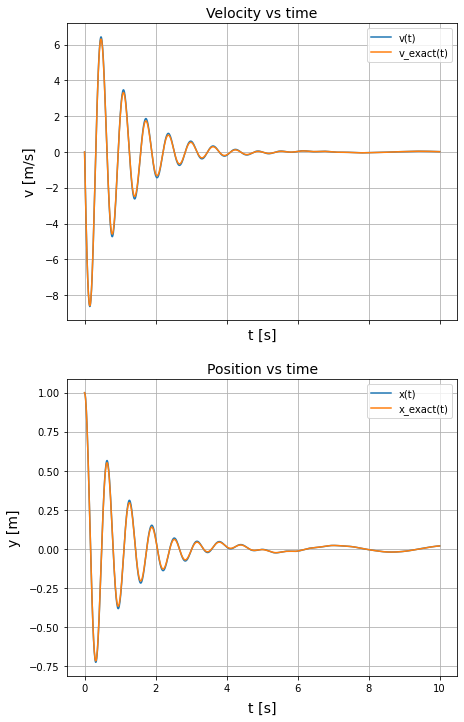

In [ ]:
# Runge-Kutta_method_2nd_order
# Oscillation

# ライブラリの読込
import numpy as np
import matplotlib.pyplot as plt
# sympyライブラリから全ての機能をimoprt
from sympy import *

# オイラー法で2階微分方程式の数値解を得る関数
# t0:tの初期値
# v0:vの初期値
# y0:y初期値
# tmax:tの最大値
def RK_method_2ord(t0, v0, x0, tmax, func, n):

    # t0～tmaxを2**n+1個に分割
    t = np.linspace(t0, tmax, 2**n + 1)

    # tの刻み幅⊿t(linspaceのtの配列の最初とその次のtの間で決める)
    dt = t[1] - t[0]

    # tと"同じ形状"の未初期化配列を生成
    # 関数の型を同じにしておかないとif文などが使えない場合があるので注意
    v = np.empty_like(t)
    x = np.empty_like(t)

    # v[0]に初期値y0を代入
    v[0] = v0
    x[0] = x0

    # ルンゲ=クッタ法でt毎の数値解を計算
    # 速度vをルンゲ=クッタ法で計算し、続いてxをルンゲ=クッタ法で計算
    for k in range(len(t) - 1):
        k1v = dt * func(t[k], x[k], v[k])
        k1x = dt * v[k]
        k2v = dt * func(t[k]+ dt/2, x[k] + k1x/2, v[k] + k1v/2)
        k2x = dt * (v[k] + k1v / 2)
        k3v = dt * func(t[k] + dt/2, x[k] + k2x/2, v[k] + k2v/2)
        k3x = dt * (v[k] + k2v / 2)
        k4v = dt * func(t[k] + dt, x[k] + k3x, v[k] + k3v)
        k4x = dt * (v[k] + k3v / 2)
        v[k+1] = v[k] + (k1v + 2 * k2v + 2 * k3v + k4v) /6   
        x[k+1] = x[k] + (k1x + 2 * k2x + 2 * k3x + k4x) /6
    
    return t, v, x

# おもりに加わる合力（運動方程式dv/dtの定義）
def eom(t,x,v):
    kom = 100
    a = 2
    c = 2
    beta = 2
    return -kom*x -a*v +c*np.sin(beta*t)

# 初期時刻
t0 = 0

# 初速度の絶対値
v0 = 0

# 投射地点の座標
x0 = 1

# 時刻の最大値
tmax = 10

# 刻み幅パラメータ 2^nだけ刻む
n = 10

# 投射関数
# t0:初期時刻
# v0:初速度の絶対値
# r0:投射地点の座標
# g:バネ定数/おもりの質量
# a:抵抗
def oscillation(t0, v0, x0, tmax, n):

    # x方向の運動方程式をルンゲ=クッタ法で解く
    t, vx, xx = RK_method_2ord(t0, v0, x0, tmax,eom,n)
    return t, xx, vx


t, x1 ,v1 = oscillation(t0, v0, x0, tmax, n)

# 解析解
var('t')
x = Function('x')(t)

# パラメータ設定
# F:微分方程式の右辺(すべての項を質量で割る)
# x0:初期位置、v0:初速度
F = -100*x -2*diff(x,t,1) +2*sin(2*t)

# 微分方程式の定義
# sympy.Eq(A, B)でA=Bを作る
# sympy.diff(x,t,2)でxをtで2階微分（加速度）
eom0 = Eq(diff(x,t,2), F)

# 微分方程式を解き一般解を得る
sol01 = dsolve(eom0)

# sympy.init_printing()により一般解をTeX形式で表示
display(sol01)

# 微分方程式を解き特解を得る
# icsにより初期条件を指定
# icsはColabのデフォルトsympy1.1.1では動作しないので、
# !pip install sympy==1.7.1
# により新しいversionのsympyに更新する必要がある
sol02 = dsolve(eom0, ics={x.subs(t,0):x0, diff(x,t,1).subs(t,0):v0})

# **.rhsで右辺だけを取り出す
eq4 = sol02.rhs
eq5 = sol02.rhs
eq6 = diff(eq5,t)

# sympy.simplifyにより式を整理
#eq4 = sp.simplify(eq4)
#eq6 = sp.simplify(eq6)

display("x(t) = {}".format(eq4))
display("v(t) = {}".format(eq6))

# 1引数を持つ関数を定義
# sympy.lambdifyでsympyのfuncをargsの順番で引数を持つnumpyに変換
# **.rhsで右辺だけを取り出す
args = (t)
nfunc1 = lambdify(args, eq4, "numpy")
nfunc2 = lambdify(args, eq6, "numpy")

T = np.linspace(t0,tmax,2**n+1)

# 描画領域の作成
# Figureに2×1個のサブプロットを格納
# Figureのサイズは4×6
# x軸を共有する
# サブプロットの上下間隔は0.20
fig, ax = plt.subplots(2, 1, figsize=(7,12), sharex="col",
                       gridspec_kw=dict(hspace=0.20))

# 速度の時間変化をプロット
ax[0].set_title("Velocity vs time", fontsize=14)
ax[0].grid()
ax[0].set_xlabel("t [s]", fontsize=14, labelpad=8)
ax[0].set_ylabel("v [m/s]", fontsize=14, labelpad=8)
ax[0].plot(T, v1, label="v(t)")
ax[0].plot(T, nfunc2(T), label="v_exact(t)")
ax[0].legend(loc='upper right')

# 高度の時間変化をプロット
ax[1].set_title("Position vs time", fontsize=14)
ax[1].grid()
ax[1].set_xlabel("t [s]", fontsize=14, labelpad=8)
ax[1].set_ylabel("y [m]", fontsize=14, labelpad=8)
ax[1].plot(T, x1, label="x(t)")                # x(t) を図示
ax[1].plot(T, nfunc1(T), label="x_exact(t)")       # x_exact(t) を図示
ax[1].legend(loc='upper right')

# 描画させる
plt.show()

In [ ]:
!pip install sympy==1.7.1

     |████████████████████████████████| 5.9MB 5.4MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
